In [ ]:

!pip install --upgrade pip



In [ ]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install opencv-python
!pip install matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install --upgrade setuptools

In [ ]:
import tensorflow as tf
import os

In [ ]:
tf.config.list_physical_devices('GPU')

[]

2. Remove dodgy images

In [ ]:
import cv2
import imghdr


In [ ]:
data_dir = '/content/drive/MyDrive/ImageClassification/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ImageClassification/data')

Found 265 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

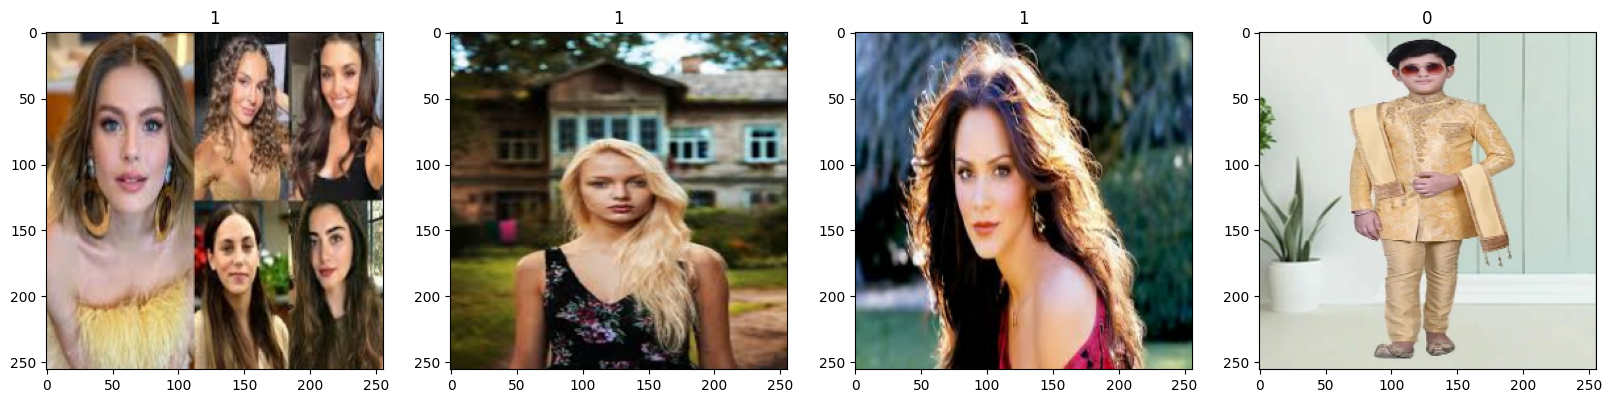

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          ...,
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589]],
 
         [[0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          ...,
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589]],
 
         [[0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          [0.09019608, 0.10196079, 0.12156863],
          ...,
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589],
          [0.1254902 , 0.13725491, 0.16470589]],
 
         ...,
 
         [[0.09019608, 0.08235294, 0.1254902 ],
          [0.09019

5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
# Define the number of epochs
epochs = 10  # You can adjust this value as needed

# Train your model
history = model.fit(train, epochs=epochs, validation_data=val)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

NameError: name 'model' is not defined

7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 19s 3s/step - loss: 0.5432 - accuracy: 0.8073 - val_loss: 0.4608 - val_accuracy: 0.8750
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.4202 - accuracy: 0.8646 - val_loss: 0.5516 - val_accuracy: 0.7812
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 0.3259 - accuracy: 0.8750 - val_loss: 0.3162 - val_accuracy: 0.8125
Epoch 4/20
6/6 [==============================] - 15s 2s/step - loss: 0.3382 - accuracy: 0.8438 - val_loss: 0.2956 - val_accuracy: 0.9062
Epoch 5/20
6/6 [==============================] - 18s 3s/step - loss: 0.3022 - accuracy: 0.8594 - val_loss: 0.4958 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 16s 2s/step - loss: 0.2898 - accuracy: 0.8542 - val_loss: 0.2436 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 0.2214 - accuracy: 0.8854 - val_loss: 0.1160 - val_accuracy: 0.9375
Epoch 8/20
6/6 [==================

8. Plot Performance

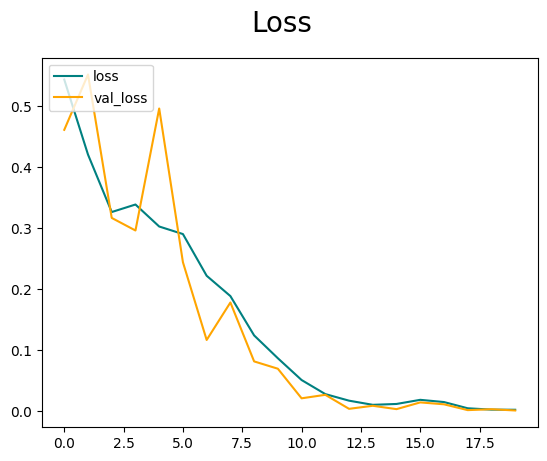

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

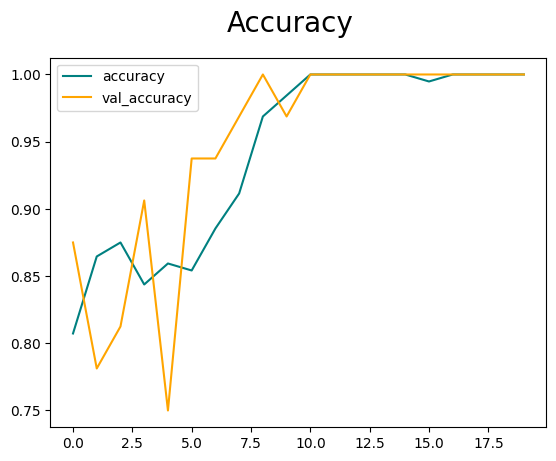

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('')
plt.imshow(img)
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(cv2.cvtColor(resize.numpy().astype('uint8'), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [ ]:
if yhat > 0.5:
    print(f'Predicted class is girl')
else:
    print(f'Predicted class is boy')

Predicted class is girl


11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/ImageClassification/models','/content/drive/MyDrive/ImageClassification/models/imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/ImageClassification/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 99ms/step


array([[1.]], dtype=float32)